In [ ]:
import numpy as np

# 확인할 .npz 파일 경로를 지정하세요
file_path = 'submodule/CONDOR/src/datasets/LAIR/capricorn/capricorn_0.npy'

data = np.load(file_path, allow_pickle=True)

# 변수 목록 출력
print("Variables in .npz:")

# 변수별 메타정보와 값 출력
for name in data.files:
    arr = data[name]
    print(f"\n=== {name} ===")
    print(f"shape = {arr.shape}, dtype = {arr.dtype}")




Variables in .npz:


AttributeError: 'numpy.ndarray' object has no attribute 'files'

In [20]:
import numpy as np

file_path = 'submodule/CONDOR/src/datasets/LAIR/double_loop/double_loop_0.npy'

# Load the .npy file
data = np.load(file_path, allow_pickle=True)

# Print basic info about the array
print("Loaded .npy file:")
print(f"Type: {type(data)}")
print(f"Shape: {data.shape}")
print(f"Dtype: {data.dtype}")

# If the data contains pickled Python objects (e.g., dict), check type and iterate accordingly
if isinstance(data, dict):
    for key, value in data.items():
        print(f"\n=== {key} ===")
        print(f"Type: {type(value)}")
        if isinstance(value, np.ndarray):
            print(f"Shape: {value.shape}, Dtype: {value.dtype}")
else:
    print(data)


Loaded .npy file:
Type: <class 'numpy.ndarray'>
Shape: (1, 364, 2)
Dtype: float64
[[[106. 276.]
  [107. 276.]
  [108. 275.]
  [110. 275.]
  [111. 274.]
  [113. 273.]
  [114. 273.]
  [116. 272.]
  [117. 272.]
  [118. 271.]
  [120. 270.]
  [122. 269.]
  [124. 269.]
  [125. 268.]
  [126. 267.]
  [127. 266.]
  [129. 266.]
  [130. 265.]
  [132. 263.]
  [134. 262.]
  [136. 261.]
  [138. 260.]
  [140. 259.]
  [144. 258.]
  [146. 257.]
  [149. 256.]
  [153. 254.]
  [158. 253.]
  [161. 252.]
  [165. 251.]
  [169. 250.]
  [172. 250.]
  [175. 249.]
  [178. 249.]
  [181. 248.]
  [184. 248.]
  [187. 248.]
  [190. 248.]
  [192. 247.]
  [195. 247.]
  [197. 247.]
  [200. 247.]
  [203. 247.]
  [206. 247.]
  [209. 247.]
  [213. 248.]
  [216. 249.]
  [219. 250.]
  [222. 252.]
  [224. 253.]
  [226. 254.]
  [228. 255.]
  [230. 257.]
  [231. 258.]
  [232. 259.]
  [234. 261.]
  [235. 262.]
  [237. 264.]
  [239. 266.]
  [239. 268.]
  [240. 270.]
  [241. 272.]
  [242. 273.]
  [242. 275.]
  [242. 276.]
  [242. 

Data preprocessing, demonstration 1 / 7
Data preprocessing, demonstration 2 / 7
Data preprocessing, demonstration 3 / 7
Data preprocessing, demonstration 4 / 7
Data preprocessing, demonstration 5 / 7
Data preprocessing, demonstration 6 / 7
Data preprocessing, demonstration 7 / 7
Mean error spline resampling: 1.5731265496603845e-16
--- Output Data Keys ---
dict_keys(['demonstrations train', 'demonstrations raw', 'demonstrations primitive id', 'n primitives', 'delta t eval', 'x min', 'x max', 'goals', 'goals training', 'max demonstration length', 'demonstrations length', 'eval indexes', 'n demonstrations', 'vel min train', 'vel max train', 'acc min train', 'acc max train'])


C:\Users\user\AppData\Local\Temp\ipykernel_9224\1937893535.py:52: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


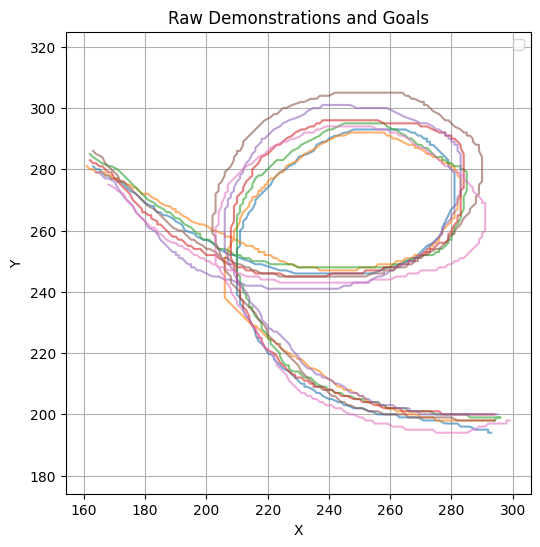

In [2]:
import os
import sys
base_dir = "C:/Users/user/Desktop/기시설/code"

src_path = os.path.join(base_dir, 'submodule', 'CONDOR', 'src')
sys.path.insert(0, src_path)
import matplotlib.pyplot as plt
from submodule.CONDOR.src.data_preprocessing.data_preprocessor import DataPreprocessor
from types import SimpleNamespace

# 1) Params 객체 정의 (필요한 필드만 간략히 작성)
params = SimpleNamespace(
    trajectories_resample_length=100,
    state_increment=0.1,
    workspace_dimensions=2,            # 2D
    dynamical_system_order=1,
    workspace_boundaries_type='from data',
    workspace_boundaries=[[0,0],[0,0]],# unused when 'from data'
    evaluation_samples_length=50,
    dataset_name='LAIR',
    selected_primitives_ids='0',     # 원하는 프리미티브 인덱스
    spline_sample_type='evenly spaced',
    imitation_window_size=10,
    verbose=False
)

# 2) 전처리 객체 생성 및 실행
preprocessor = DataPreprocessor(params)
output = preprocessor.run()

# 3) 원시 궤적과 목표점 가져오기
print("--- Output Data Keys ---")
print(output.keys()) # output 딕셔너리의 모든 키(데이터 이름)를 출력

raw_demos = output['demonstrations raw']       # list of arrays shape (2, T)
goals     = output['goals']                    # array shape (n_primitives, 2)

# 4) 시각화
plt.figure(figsize=(6,6))
for traj in raw_demos:
    x, y = traj[0], traj[1]
    plt.plot(x, y, alpha=0.6)
    

# 목표점은 붉은 X 마커로
# plt.scatter(goals[:,0], goals[:,1], c='r', marker='x', s=100, label='Goals')

plt.title('Raw Demonstrations and Goals')
plt.xlabel('X')
plt.ylabel('Y')
plt.axis('equal')
plt.legend()
plt.grid(True)
plt.show()


In [16]:
print(output['demonstrations train'].shape)
print(output["demonstrations raw"][1].shape)

(7, 100, 2, 10)
(2, 294)


In [6]:
output['demonstrations train'][0,0,0,:]

array([-0.81529582, -0.80808081, -0.8008658 , -0.78643579, -0.77922078,
       -0.76479076, -0.75757576, -0.74314574, -0.73593074, -0.72871573])

Processing 34 files from 'embedding/embedding_ll'...
Finished processing files. Found 5 unique primitive IDs.
Displaying plots...


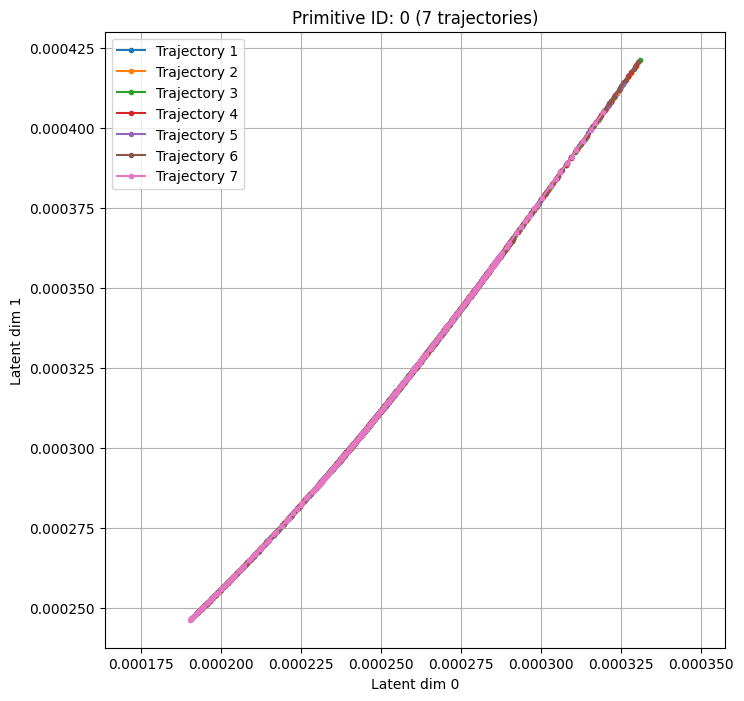

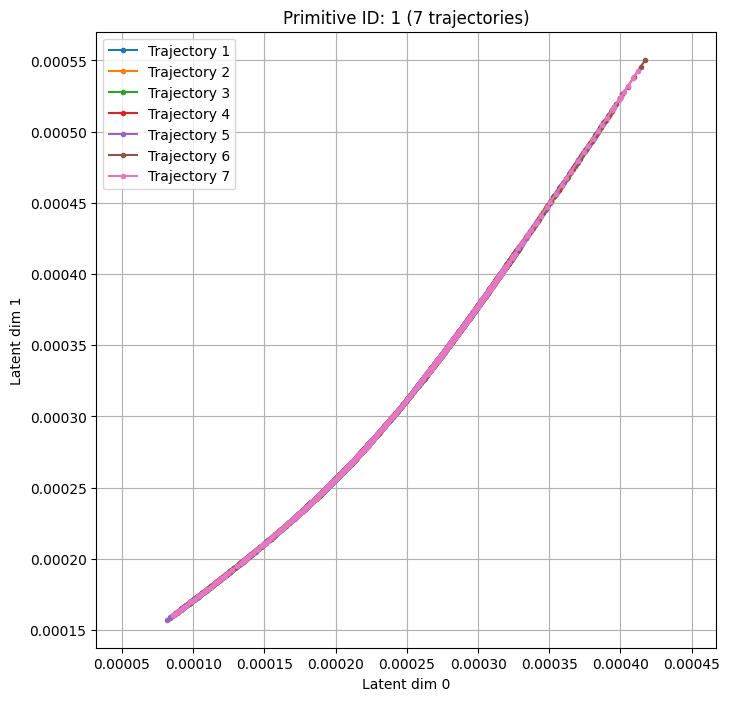

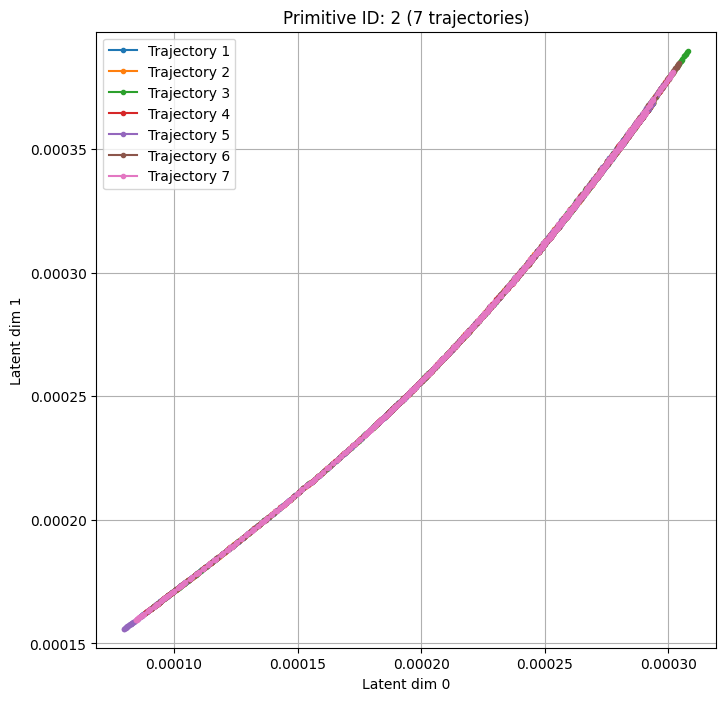

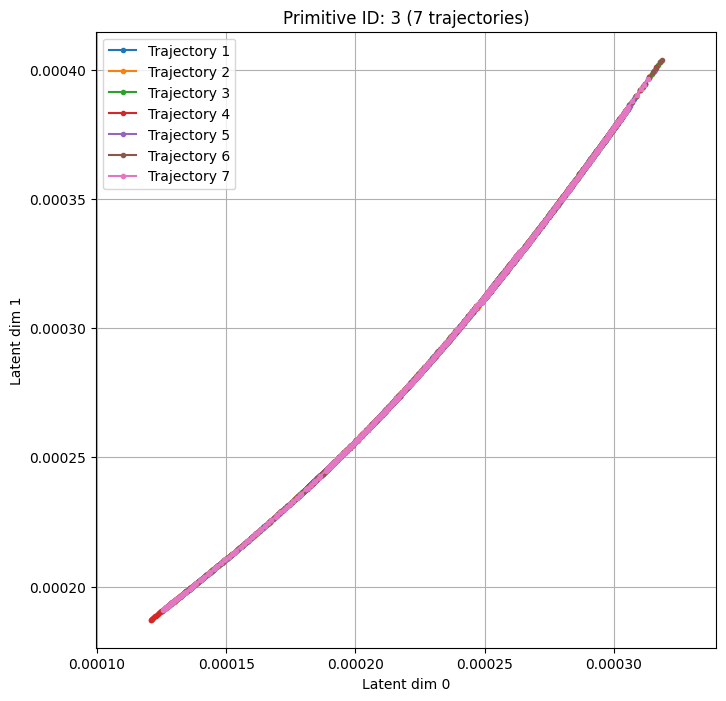

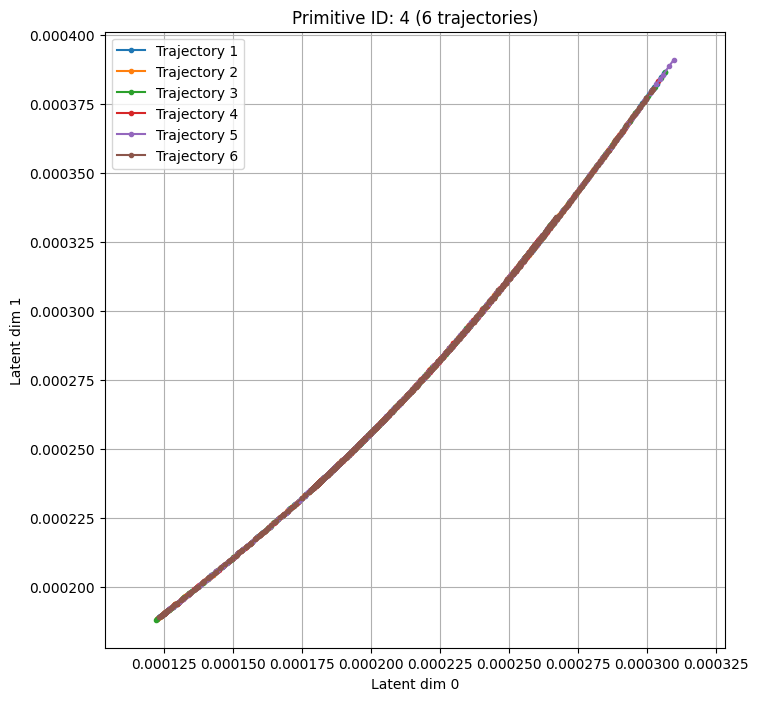

Script finished.


In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import collections # 데이터를 그룹화하기 위해 사용

# 1) 임베딩 파일이 들어있는 디렉토리
emb_dir = 'embedding/embedding_ll' # 혹은 실제 경로

# 2) .npz 파일 목록
# 디렉토리가 존재하는지 확인
if not os.path.exists(emb_dir):
    print(f"Error: Directory '{emb_dir}' not found.")
    exit() # 또는 다른 오류 처리

files = sorted(f for f in os.listdir(emb_dir) if f.endswith('.npz'))

if not files:
    print(f"No .npz files found in '{emb_dir}'.")
    exit()

# primitive_id 별로 임베딩 데이터를 저장할 딕셔너리
# { primitive_id: [emb_array1, emb_array2, ...], ... } 형태가 될 것임
grouped_embeddings = collections.defaultdict(list)

print(f"Processing {len(files)} files from '{emb_dir}'...")

# 3) .npz 파일을 읽어서 primitive_id 별로 데이터 그룹화
for fname in files:
    path = os.path.join(emb_dir, fname)
    try:
        data = np.load(path, allow_pickle=True)

        # 필요한 키('embeddings', 'primitive_id')가 있는지 확인
        if 'embeddings' not in data or 'primitive_id' not in data:
            print(f"Warning: Skipping '{fname}' - missing 'embeddings' or 'primitive_id' key.")
            continue

        emb = data['embeddings'] # (T_i, latent_dim)
        prim = int(data['primitive_id']) # scalar

        # 임베딩 데이터의 차원이 충분한지 확인 (최소 2차원 필요)
        if emb.ndim < 2 or emb.shape[1] < 2:
             print(f"Warning: Skipping '{fname}' - 'embeddings' shape is {emb.shape}, need at least (T_i, 2).")
             continue

        # 해당 primitive_id에 임베딩 데이터 추가
        grouped_embeddings[prim].append(emb)
        # print(f"Processed '{fname}' (primitive={prim})") # 처리 상황 확인용

    except Exception as e:
        print(f"Error loading or processing file '{fname}': {e}")
        continue # 오류 발생 시 해당 파일 건너뛰기

print(f"Finished processing files. Found {len(grouped_embeddings)} unique primitive IDs.")

# 4) 그룹화된 데이터를 바탕으로 그래프 그리기
# primitive_id를 순서대로 정렬하여 그래프를 순차적으로 표시
sorted_prims = sorted(grouped_embeddings.keys())

if not sorted_prims:
    print("No valid data grouped by primitive ID to plot.")

for prim in sorted_prims:
    embeddings_list = grouped_embeddings[prim]

    # 해당 primitive_id에 대한 새로운 Figure 생성
    plt.figure(figsize=(8, 8)) # Figure 크기 설정 (선택 사항)

    # 같은 primitive_id를 가진 모든 궤적을 현재 Figure에 그리기
    for i, emb in enumerate(embeddings_list):
        # 잠재 공간 첫 두 차원으로 궤적 형태 플롯
        # 각 궤적은 기본적으로 다른 색상으로 그려짐
        plt.plot(emb[:, 0], emb[:, 1], '-o', markersize=3, label=f'Trajectory {i+1}') # 궤적 번호로 라벨 추가

    # 그래프 제목 및 축 라벨 설정
    plt.title(f"Primitive ID: {prim} ({len(embeddings_list)} trajectories)")
    plt.xlabel('Latent dim 0')
    plt.ylabel('Latent dim 1')
    plt.axis('equal') # x, y 축 스케일을 같게
    plt.grid(True)
    plt.legend() # 궤적 라벨 표시

# 5) 모든 그림 표시
# 모든 primitive_id에 대한 Figure 생성이 완료된 후 한 번에 표시
if grouped_embeddings:
    print("Displaying plots...")
    plt.show()

print("Script finished.")

C:\Users\user\AppData\Local\Temp\ipykernel_9224\2071311293.py:60: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(params.results_path + "encoder_triple

Avg Triplet Loss along trajectory: 1.712114


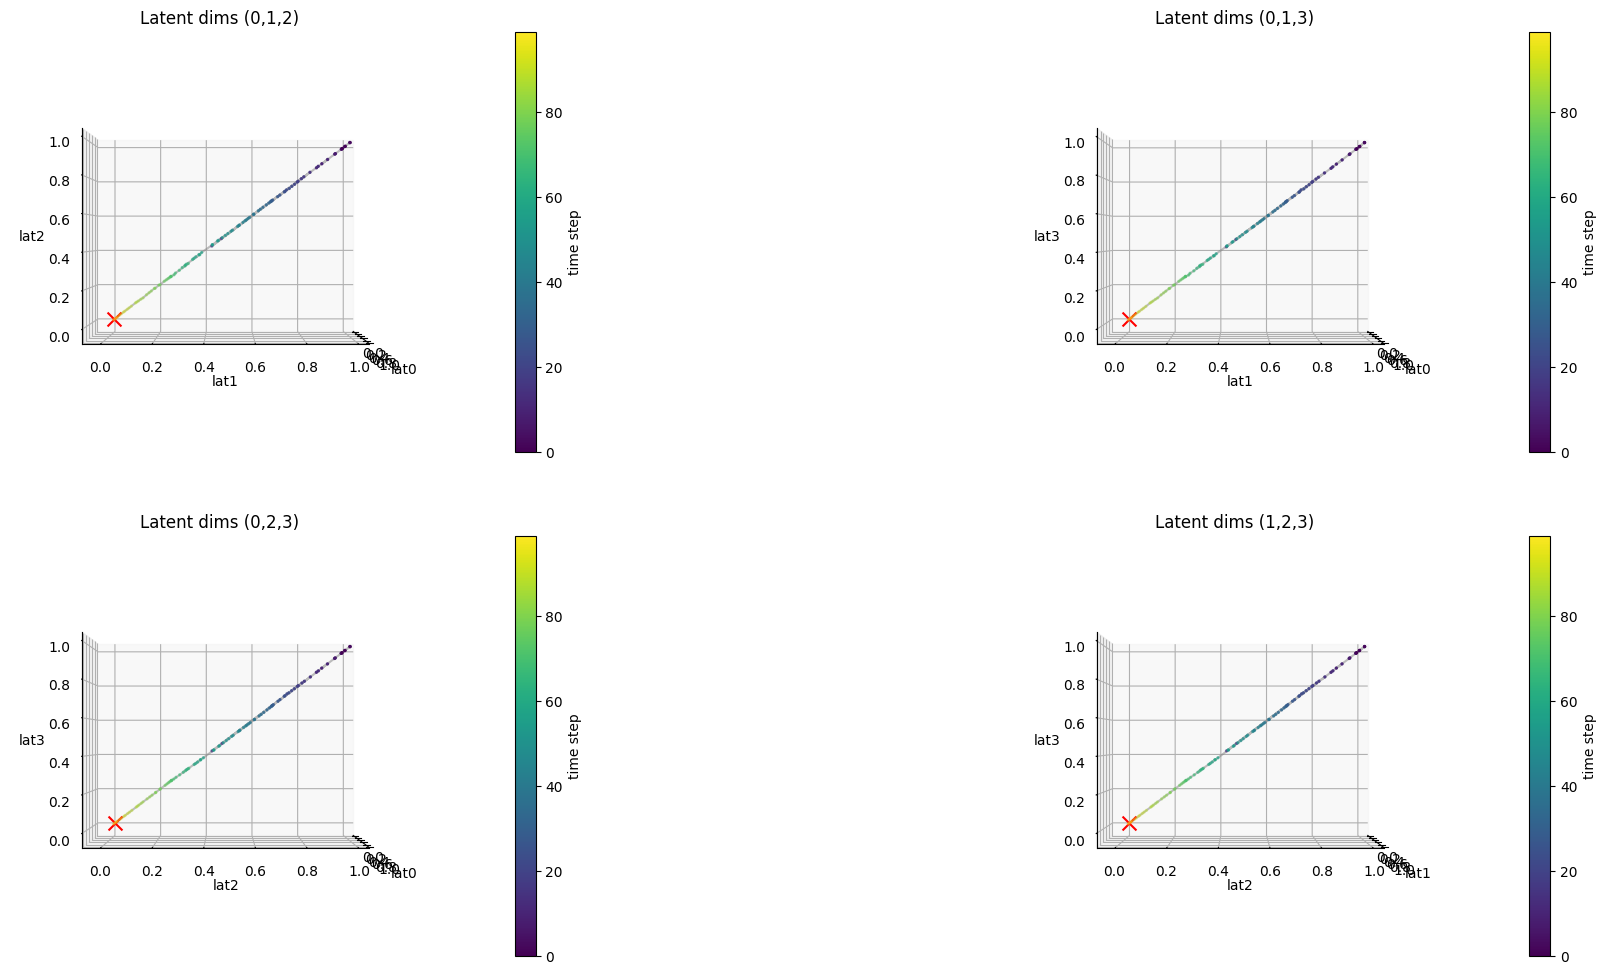

In [43]:
# %%
# Imports and setup
%matplotlib inline
import torch
import numpy as np
import matplotlib.pyplot as plt
from dataclasses import dataclass
from mpl_toolkits.mplot3d import Axes3D

# Condor pipeline imports
from submodule.CONDOR.src.data_preprocessing.data_preprocessor import DataPreprocessor
from encoder import Encoder

# %%
# Define or import TrainParams (same as used during training)
@dataclass
class InferenceParams:
    workspace_dimensions: int = 2
    dynamical_system_order: int = 2
    dataset_name: str = "LAIR"
    selected_primitives_ids: str = "0"
    trajectories_resample_length: int = 100
    state_increment: float = 0.2
    workspace_boundaries_type: str = "from data"
    workspace_boundaries: tuple = ((-1, 1),) * 3
    spline_sample_type: str = "evenly spaced"
    evaluation_samples_length: int = 10
    imitation_window_size: int = 2
    triplet_margin = 1e-4

    latent_space_dim: int = 4
    hidden_size: int = 300

    device: str = "cpu"
    results_path: str = "results/"

params = InferenceParams()

# %%
# 1. Load and preprocess data
data = DataPreprocessor(params=params, verbose=False).run()
# Use training or test demonstrations
demos = data['demonstrations train']  # shape: (n_traj, n_steps, dim_ws, window)
primitive_ids = np.array(data['demonstrations primitive id'])
n_primitives = data['n primitives']

# %%
# 2. Load trained encoder
dim_state = params.workspace_dimensions * params.dynamical_system_order
device = params.device
encoder = Encoder(
    dim_state=dim_state,
    n_primitives=n_primitives,
    latent_space_dim=params.latent_space_dim,
    hidden_size=params.hidden_size,
    device=device
).to(device)

# Load weights (ignoring missing goal buffer)
checkpoint = torch.load(params.results_path + "encoder_triplet_ver2.pt", map_location=device)
encoder.load_state_dict(checkpoint, strict=False)
encoder.eval()

# %%
# 3. Encode a single demonstration in latent space
traj_idx = 6  # index of trajectory to visualize
demo = demos[traj_idx]  # shape: (n_steps, dim_ws, window)
n_steps, dim_ws, window = demo.shape

latent_traj = []
for t in range(n_steps):
    pos = demo[t, :, 0]  # (dim_ws,)
    if params.dynamical_system_order == 2:
        next_pos = demo[t, :, 1]
        vel = next_pos - pos
        from submodule.CONDOR.src.agent.utils.dynamical_system_operations import normalize_state
        vel_norm = normalize_state(
            torch.tensor(vel).view(1, dim_ws, 1),
            x_min=torch.tensor(data['vel min train']).view(1, dim_ws, 1),
            x_max=torch.tensor(data['vel max train']).view(1, dim_ws, 1)
        ).squeeze()
        state_vec = torch.cat([torch.tensor(pos), vel_norm], dim=0)
    else:
        state_vec = torch.tensor(pos)

    x_input = state_vec.view(1, -1).float().to(device)
    prim_tensor = torch.tensor([primitive_ids[traj_idx]], device=device)
    with torch.no_grad():
        lat = encoder(x_input, prim_tensor).cpu().numpy().squeeze()
    latent_traj.append(lat)

latent_traj = np.stack(latent_traj)  # shape: (n_steps, latent_space_dim)

# %%
# 3.5. Compute goal embedding on the fly
prim_id = primitive_ids[traj_idx]
goal_pos = data['goals training'][prim_id]   # (dim_ws,)

if params.dynamical_system_order == 2:
    zero_vel = np.zeros_like(goal_pos)
    from submodule.CONDOR.src.agent.utils.dynamical_system_operations import normalize_state
    vel_norm_goal = normalize_state(
        torch.tensor(zero_vel).view(1, dim_ws, 1),
        x_min=torch.tensor(data['vel min train']).view(1, dim_ws, 1),
        x_max=torch.tensor(data['vel max train']).view(1, dim_ws, 1)
    ).squeeze()
    x_goal = torch.cat([torch.tensor(goal_pos), vel_norm_goal], dim=0)
else:
    x_goal = torch.tensor(goal_pos)

x_goal = x_goal.view(1, -1).float().to(device)
prim_tensor = torch.tensor([prim_id], device=device)

with torch.no_grad():
    goal_lat = encoder(x_goal, prim_tensor).cpu().numpy().squeeze()  # (latent_space_dim,)
    
    


margin = params.triplet_margin if hasattr(params, 'triplet_margin') else 1.0
loss_fn = torch.nn.TripletMarginLoss(margin=margin, p=2)

# 텐서 변환
latents = torch.tensor(latent_traj, dtype=torch.float32)       # (n_steps, latent_dim)
goal = torch.tensor(goal_lat, dtype=torch.float32).unsqueeze(0) # (1, latent_dim)
# 반복: 마지막 스텝은 다음 스텝이 없으므로 n_steps-1까지만
losses = []
for t in range(latents.size(0) - 1):
    # viz 쪽
    anchor   = torch.tensor(goal_lat).unsqueeze(0)
    positive = latents[t+1].unsqueeze(0)
    negative = latents[t].unsqueeze(0)
    l = loss_fn(anchor, positive, negative)

    losses.append(l.item())

triplet_loss = float(np.sum(losses))
print(f"Avg Triplet Loss along trajectory: {triplet_loss:.6f}")

# %%
# 4. Plot 3D subplots including on-the-fly goal
combinations = [(0,1,2), (0,1,3), (0,2,3), (1,2,3)]
# 4. Plot 3D subplots with gradient color
fig = plt.figure(figsize=(24, 12))
t_idxs = np.arange(latent_traj.shape[0])  # 시간 인덱스 0,1,...,n_steps-1

for i, (a,b,c) in enumerate(combinations, 1):
    ax = fig.add_subplot(2, 2, i, projection='3d')
    ax.plot(latent_traj[:, a], latent_traj[:, b], latent_traj[:, c],
            color='gray', alpha=0.5)
    sc = ax.scatter(
        latent_traj[:, a], latent_traj[:, b], latent_traj[:, c],
        c=t_idxs,           # 각 점에 색 지정
        cmap='viridis',     # matplotlib colormap
        s=2                # 점 크기
    )
    ax.scatter(goal_lat[a], goal_lat[b], goal_lat[c],
               marker='x', s=100, c='red', label='goal')
    X = latent_traj[:-1, a]
    Y = latent_traj[:-1, b]
    Z = latent_traj[:-1, c]
    U = latent_traj[1:, a] - X
    V = latent_traj[1:, b] - Y
    W = latent_traj[1:, c] - Z
    # ax.quiver(X, Y, Z, U, V, W,
            #   length=0.001, normalize=True, color='red', linewidth=0.1)
    # 컬러바 추가
    fig.colorbar(sc, ax=ax, pad=0.1, label='time step')
    ax.set_xlabel(f'lat{a}')
    ax.set_ylabel(f'lat{b}')
    ax.set_zlabel(f'lat{c}')
    ax.set_title(f'Latent dims ({a},{b},{c})')
    ax.view_init(elev=0, azim=0)



In [40]:
latent_traj

array([[ 0.9517947 ,  0.94411886,  0.94263303,  0.94282734],
       [ 0.9631111 ,  0.9546883 ,  0.95349747,  0.95408154],
       [ 0.98219067,  0.9725534 ,  0.9718962 ,  0.9731147 ],
       [ 0.98256975,  0.97171664,  0.97223926,  0.97362125],
       [ 0.9623639 ,  0.9528729 ,  0.95248806,  0.95340407],
       [ 0.94879925,  0.9407121 ,  0.939501  ,  0.9398638 ],
       [ 0.9487079 ,  0.94032425,  0.9393033 ,  0.9397441 ],
       [ 0.9255839 ,  0.91780275,  0.91695046,  0.9167073 ],
       [ 0.92303413,  0.91543156,  0.9144714 ,  0.91415477],
       [ 0.87326795,  0.8664519 ,  0.8658618 ,  0.86522484],
       [ 0.89523524,  0.8882813 ,  0.8875365 ,  0.8864999 ],
       [ 0.8523504 ,  0.8461598 ,  0.8455721 ,  0.8439741 ],
       [ 0.85949475,  0.85254884,  0.8528745 ,  0.8511194 ],
       [ 0.42680126,  0.42723426,  0.42803735,  0.424002  ],
       [ 0.8280052 ,  0.8209216 ,  0.8223182 ,  0.8202257 ],
       [ 0.46796328,  0.46675307,  0.46964443,  0.465469  ],
       [ 0.803833  ,  0.

In [21]:
print(latents[0],latents[1],anchor.squeeze(0))
print(loss_fn(anchor.squeeze(0),latents[1],latents[0]))
print(torch.norm(anchor.squeeze(0)-latents[1]))
print(torch.norm(anchor.squeeze(0)-latents[0]))

tensor([ 1.9747, -0.1324,  4.8360,  2.2940]) tensor([ 1.9694, -0.1330,  4.8508,  2.2912]) tensor([ 1.9028, -0.1397,  4.9969,  2.2829])
tensor(0.9842)
tensor(0.1609)
tensor(0.1767)


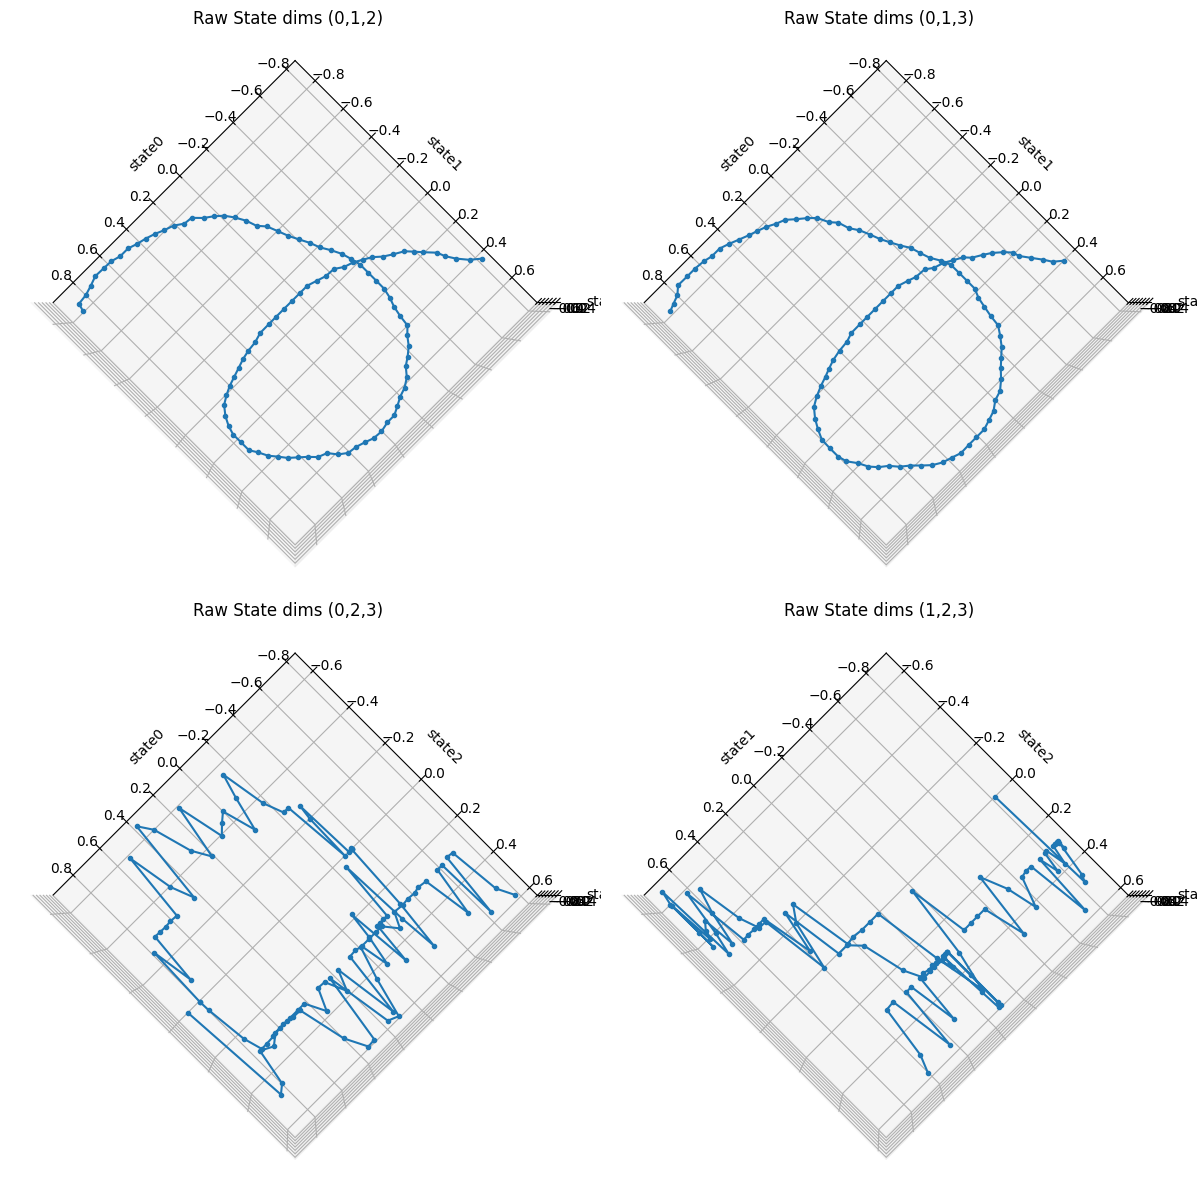

In [51]:
# %% 
# 5. Plot raw state trajectories for the same demo
# 원본 state 차원: dim_state = workspace_dimensions * dynamical_system_order
state_traj = []  # shape: (n_steps, dim_state)
for t in range(n_steps):
    pos = demo[t, :, 0]  # 위치
    if params.dynamical_system_order == 2:
        next_pos = demo[t, :, 1]
        vel = next_pos - pos
        # 정규화(선택 사항; latent와 동일하게 보려면 정규화하세요)
        from submodule.CONDOR.src.agent.utils.dynamical_system_operations import normalize_state
        vel_norm = normalize_state(
            torch.tensor(vel).view(1, dim_ws, 1),
            x_min=torch.tensor(data['vel min train']).view(1, dim_ws, 1),
            x_max=torch.tensor(data['vel max train']).view(1, dim_ws, 1)
        ).squeeze().numpy()
        state_vec = np.concatenate([pos, vel_norm], axis=0)
    else:
        state_vec = pos
    state_traj.append(state_vec)
state_traj = np.stack(state_traj)  # (n_steps, dim_state)

# 6. 3D raw state subplots (first 3 dims of state_vec)
fig = plt.figure(figsize=(12,12))
# we only have dim_state=4 at most, so we can do same 4 combos:
for i, (a,b,c) in enumerate(combinations, 1):
    ax = fig.add_subplot(2,2,i, projection='3d')
    ax.plot(
        state_traj[:, a], 
        state_traj[:, b], 
        state_traj[:, c], 
        marker='o', 
        markersize=3
    )
    ax.set_xlabel(f'state{a}')
    ax.set_ylabel(f'state{b}')
    ax.set_zlabel(f'state{c}')
    ax.set_title(f'Raw State dims ({a},{b},{c})')
    ax.view_init(elev=90, azim=45)
plt.tight_layout()
plt.show()


In [50]:
for i in range(100):
    print(state_traj[i])

[-0.74879227  0.38288288  0.55535748 -0.21220132]
[-0.70687403  0.34931809  0.48991769 -0.2942463 ]
[-0.67614502  0.30757969  0.27738162 -0.21220132]
[-0.64614421  0.26278501  0.27738162 -0.38671525]
[-0.61615557  0.21798319  0.55044265 -0.55455092]
[-0.58205614  0.17558931  0.27738162  0.06861248]
[-0.55125438  0.14264264  0.27738162  0.0121922 ]
[-0.51245212  0.10834111  0.47627834 -0.11305605]
[-0.46830535  0.08258258  0.27738162  0.05813301]
[-0.42620159  0.05689928  0.27738162 -0.21220132]
[-0.38759442  0.02391618  0.27738162  0.10396211]
[-3.44479501e-01  3.43883558e-04  2.77381622e-01 -4.59273849e-02]
[-0.30102646 -0.02252252  0.27738162  0.11016867]
[-0.25381262 -0.03753754  0.27956165 -0.20946811]
[-0.2100456  -0.06462631  0.33183371  0.06804105]
[-0.15667544 -0.06797709  0.28496312 -0.20269604]
[-0.10926544 -0.08258258  0.27738162  0.13631023]
[-0.05914593 -0.0975976   0.27738162  0.13631023]
[-0.00473994 -0.0975976   0.27738162  0.13631023]
[ 0.04966606 -0.0975976   0.400754